In [1]:
import pandas as pd
import matplotlib

In [11]:
mvp_voting_df : pd.DataFrame= pd.read_csv('../data/mvp_voting_1991-2022.csv')
# Remove player stat data from the MVP voting data 
# since we already have this information in the player stats csv
voting_data_cols = ['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']
 
mvp_voting_df = mvp_voting_df[voting_data_cols]

In [3]:
player_stats_df : pd.DataFrame = pd.read_csv('../data/player_stats_1991-2022.csv')
# Delete extraneous columns from the player data
del player_stats_df['Rk']
# del player_stats_df['Unnamed: 0']
# Delete any asterisks on player names for successful combination
player_stats_df['Player'] = player_stats_df['Player'].str.replace('*','',regex=False)

# There are multiple entries for players that play for multiple teams into a single entry
player_stats_df.groupby(['Player','Year']).get_group(('Greg Anderson',1991)) 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,0.43,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,0.37,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.00,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,0.44,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [4]:
# Combine the grouped data so that each player only has one entry per season 
def single_row(df : pd.DataFrame):
    if df.shape[0] == 1: # If there is only one entry, we are all set
        return df
    else: # If there are multiple entries, the entry for the team 'TOT' has the player's total stats
        row = df[df['Tm'] == 'TOT'] # Use the TOT entry for the total stats
        # Replace the team TOT with the player's most recent team 
        row['Tm'] = df.iloc[-1, :]['Tm'] 
        return row

player_stats_df = player_stats_df.groupby(['Player', 'Year']).apply(single_row)

In [5]:
# Drop the multi-indexes that were created with the groupby() function
player_stats_df.index = player_stats_df.index.droplevel()
player_stats_df.index = player_stats_df.index.droplevel()

In [6]:
player_stats_df[player_stats_df['Player'] == 'Greg Anderson']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4.0,0.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
449,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,0.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1358,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,0.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1838,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,0.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2289,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,0.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2836,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,0.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3408,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,0.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [10]:
mvp_voting_df.columns

Index(['Player', 'Year', 'Pts Won', 'Pts Max', 'Share'], dtype='object')

In [7]:
# Merge the player stat and MVP voting data into a single dataframe
# Do an outer merge, since the player data has all player data (even those that got 0 mvp votes)
full_player_df = player_stats_df.merge(mvp_voting_df, how='outer',on=['Player','Year'])
# Check to see if the merge properly carried over players who received votes
full_player_df.head(20)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
5,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN
6,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN
7,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN
8,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,0.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN
9,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,0.447,...,1.0,0.6,0.2,0.6,1.5,5.0,2000,NaN,NaN,NaN


In [8]:
# Fill NaN values denoting 0 MVP votes won with 0s
full_player_df[['Pts Won','Pts Max','Share']] = full_player_df[['Pts Won','Pts Max','Share']].fillna(0)

In [9]:
# Read in the team stats DF for cleaning
team_data_df : pd.DataFrame = pd.read_csv('../data/team_data_1991-2022.csv')
# Delete any asterisks on player names for successful combination
team_data_df['Team'] = team_data_df['Team'].str.replace('*','',regex=False)
team_data_df['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [10]:
full_player_df['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [11]:
nicknames = {}

with open('nicknames.csv') as f: 
    lines = f.readlines()
    for line in lines[1:]: # Skip the first line that describes the CSV
         # Remove the new line from the CSV
        # Split the line into the nickname : name mapping ex. ATL : Atlanta Hawks
        abbrev, name = line.replace('\n','').split(',')
        nicknames[abbrev] = name
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [12]:
full_player_df['Team'] = full_player_df['Tm'].map(nicknames)
full_player_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,0.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14693,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,0.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14694,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,0.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14695,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,0.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [13]:
# Merge our player stats DF with the team data frame
team_and_stats_df = full_player_df.merge(team_data_df, how = 'outer', on=['Team', 'Year'])
team_and_stats_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [14]:
# Convert games back into numbers - replace any -'s with 0 to indicate to games back
team_and_stats_df['GB']= team_and_stats_df['GB'].str.replace('—','0')
# Convert the any numeric data types (PTS, G, AST, etc.) from objects into numbers
team_and_stats_df = team_and_stats_df.apply(pd.to_numeric, errors='ignore')
team_and_stats_df.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

# Clean the data once more - check for and remove any null or missing values

In [15]:
# Check for any null data
pd.isnull(team_and_stats_df).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          59
3P            0
3PA           0
3P%        2086
2P            0
2PA           0
2P%         100
eFG%         59
FT            0
FTA           0
FT%         521
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [16]:
null_shooters : pd.DataFrame = team_and_stats_df[pd.isnull(team_and_stats_df['3P%'])]
null_shooters[['3PA']].sum()

3PA    0.0
dtype: float64

In [17]:
# The null values are only in the shooting % columns 
# Players who attempted 0 shots have null shooting percentages 
# Replace any missing or null values with 0  
team_and_stats_df.fillna(0, inplace=True)
pd.isnull(team_and_stats_df).sum()


Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

<Axes: xlabel='Player'>

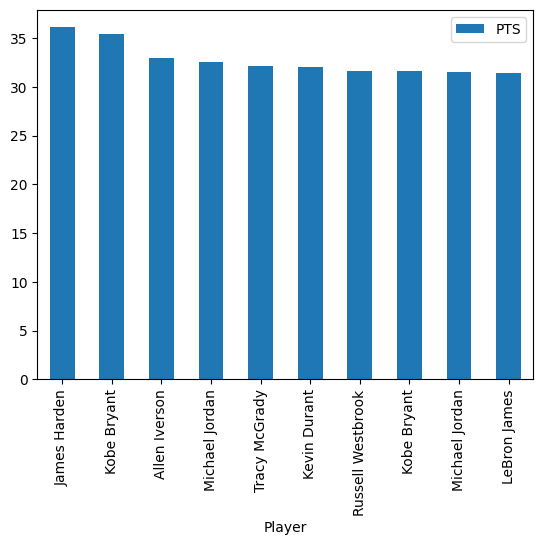

In [18]:
# To display the highest the top scoring seasons of all time
highest_scorers = team_and_stats_df[team_and_stats_df['G'] > 70].sort_values('PTS',ascending=False).head(10)
highest_scorers.plot.bar('Player','PTS')

<Axes: xlabel='Year'>

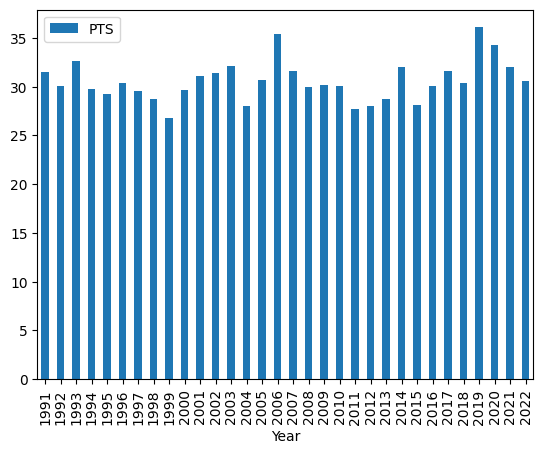

In [19]:
# To display the leading scorer each year 
yearly_leading_scores = team_and_stats_df.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending=False).head(1))
yearly_leading_scores.plot.bar('Year','PTS')

# Looking at our combined dataframe - extracting the best shooters

In [20]:
snipers = team_and_stats_df.loc[(team_and_stats_df['3P%'] > 0.45) 
                              & (team_and_stats_df['G'] > 65)
                                & (team_and_stats_df['Year'] > 2010)
                                & (team_and_stats_df['3PA'] >= 4.0)    
                            ]
snipers = snipers[['Player','Year','3P%','3PA','TRB','AST','PTS']]
snipers['TOTALS'] = snipers['PTS'] + snipers['TRB'] + snipers['AST']
snipers.sort_values(by=['TOTALS'], ascending=False,inplace=True)
snipers

,Player,Year,3P%,3PA,TRB,AST,PTS,TOTALS
5824,Stephen Curry,2016,0.454,11.2,5.4,6.7,30.1,42.2
6983,Stephen Curry,2013,0.453,7.7,4.0,6.9,22.9,33.8
11864,Joe Ingles,2021,0.451,6.1,3.6,4.7,12.1,20.4
3565,Joe Harris,2019,0.474,5.1,3.8,2.4,13.7,19.9
4388,Joe Harris,2021,0.475,6.4,3.6,1.9,14.1,19.6
10029,JJ Redick,2016,0.475,5.6,1.9,1.4,16.3,19.6
2665,Kyle Korver,2014,0.472,5.5,4.0,2.9,12.0,18.9
2680,Kyle Korver,2015,0.492,6.0,4.1,2.6,12.1,18.8
2652,Kyle Korver,2013,0.457,5.6,4.0,2.0,10.9,16.9
13636,Danny Green,2019,0.455,5.4,4.0,1.6,10.3,15.9


In [21]:
team_and_stats_df.to_csv('../data/full_player_data_1991-2022.csv',index=False)
